<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/Glycolytic_oscilations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pysces

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00


# A simple model for glycolysis oscillations

We will now work with the simple model described earlier in class. The model is taken from the following paper:
https://doi.org/10.1016/0301-4622(90)88033-O


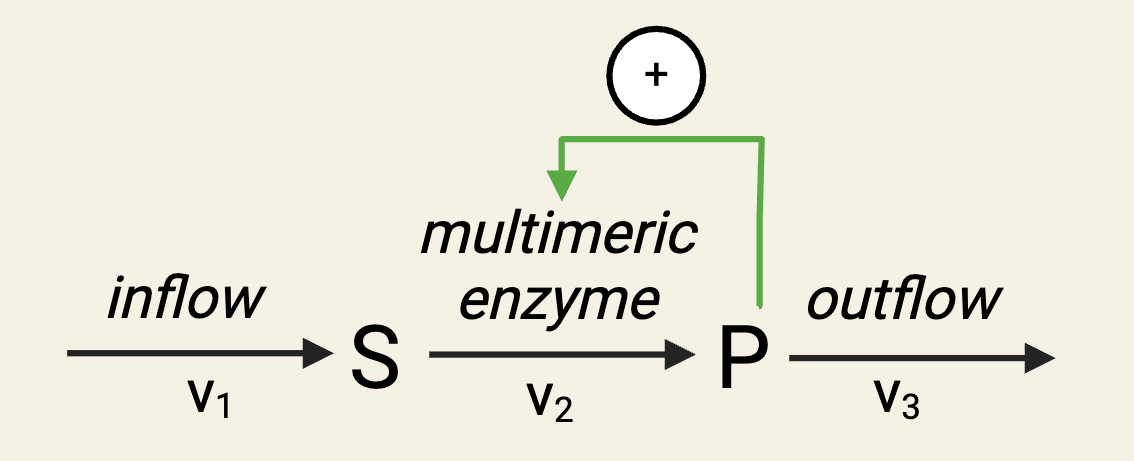


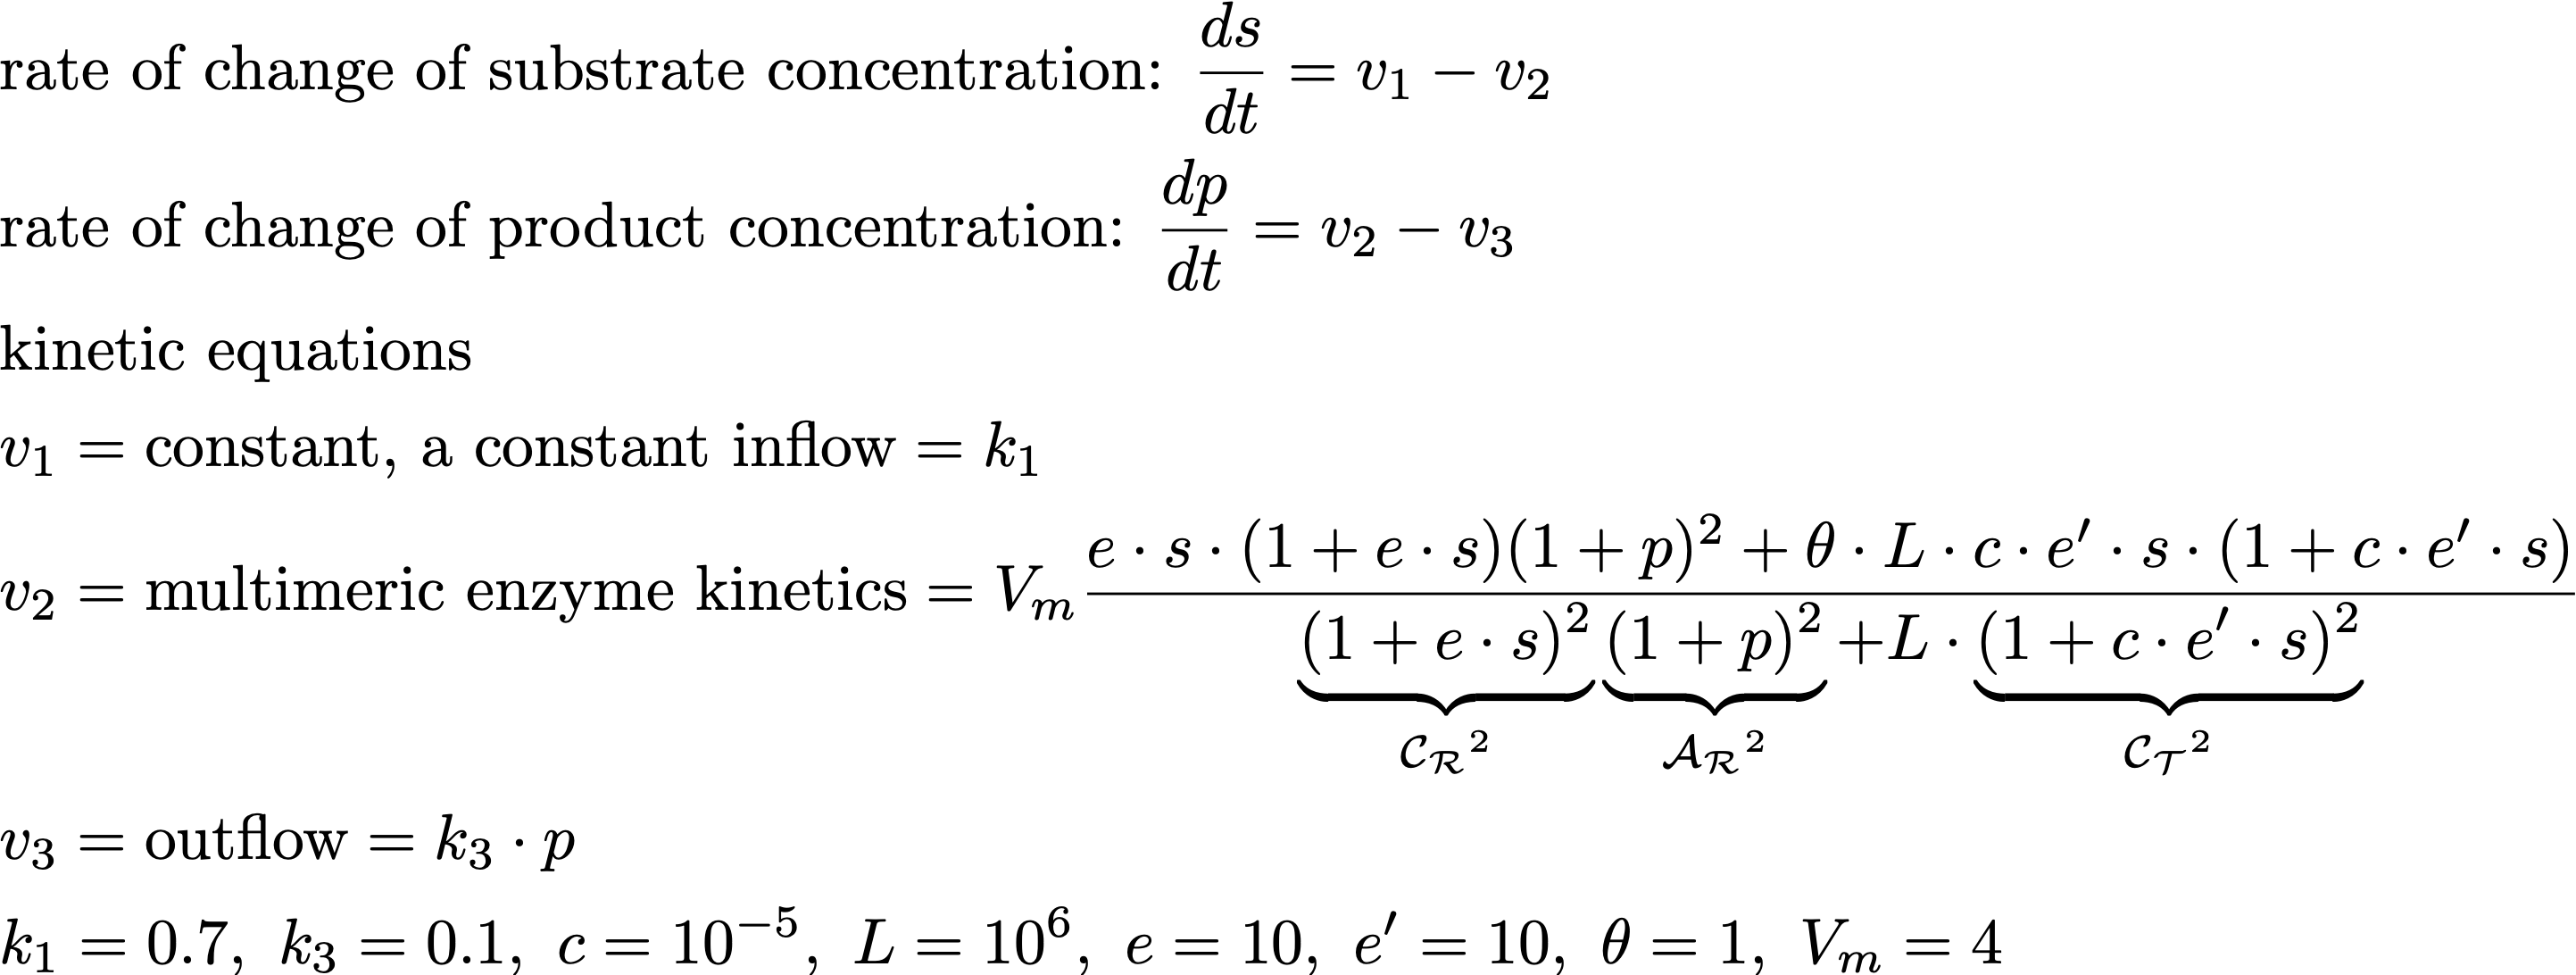

# Exercise

We will do this exercise using PySCeS.

1. Write down the rate equation for $v_2$. This process is catalyzed by a multimeric enzyme (n=2), with **P** as both product and allosteric activator.

2. Write the PySCeS model. You can use the example from the earlier class as a guide.

3. Perform the simulation and confirm that you see the oscillations.


1. $$ v_2 = V_m$$

In [35]:
import pysces
import pandas as pd
import matplotlib.pyplot as plt

In [61]:

model_description = '''
#Reactions
r1:
$pool = s
k1 #Reaction rate

r2:
s = p
V_m * (e*s*(1 + e*s)*(1+p)**2 + theta*L*c*ep*s*(1+c*ep*s)) / ((1+e*s)**2*(1+p)**2+L*(1+c*ep*s)**2)

r3:
p = $pool
k3 * p

#parameters
k1 = 0.7
k3 = 0.1
c = 1e-5
L = 1e6
e = 1
ep = 1
theta = 1
V_m = 4

#Initial values
s = 1
p = 10000000

'''

In [62]:
model = pysces.model('my_model', loader='string', fString=model_description)

Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model.psc
/root/Pysces/psc/orca/my_model.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model.psc
Info: No reagents have been fixed
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 


In [63]:
model.doSim(end=1000, points = 100000)

/usr/local/lib/python3.11/dist-packages/pysces/PyscesModel.py:4058: ODEintWarning: Integration successful.
  sim_res, infodict = scipy.integrate.odeint(


LSODA time for 100000 points: 1.3589601516723633


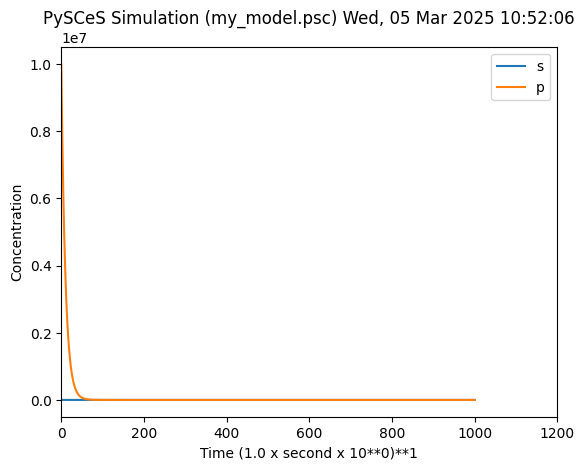

In [64]:
model.SimPlot()

# Finding the attractor

Are these oscillations stable? To examine this, we will try to find the limit cycle attractor.

1. Extract the time series from the PySCeS simmulations using the following code.
2. Make a phase plot: plot the concentration of S against the concentration of P.
3. Make the same plot, but with different starting concentrations of S and P:
  * $s_0 = 65$, $p_0= 10$
  * $s_0 = 20$, $p_0= 20$
  * $s_0 = 100$, $p_0= 100$

4. Do we always arrive in the same (cycling) concentrations?

5. Now play around with the parameters of the model and see in which cases the oscillations persist.

In [65]:
species, labels = model.data_sim.getSpecies(lbls=True)
result = pd.DataFrame(species, columns=[labels])
result

,Time,s,p
0,0.00,1.000000,1.000000e+07
1,0.01,0.987065,9.990005e+06
2,0.02,0.974260,9.980020e+06
3,0.03,0.961586,9.970045e+06
4,0.04,0.949043,9.960080e+06
...,...,...,...
99995,999.96,96.736700,1.294133e+00
99996,999.97,96.741771,1.294768e+00
99997,999.98,96.746841,1.295403e+00
99998,999.99,96.751909,1.296038e+00


<function matplotlib.pyplot.show(close=None, block=None)>

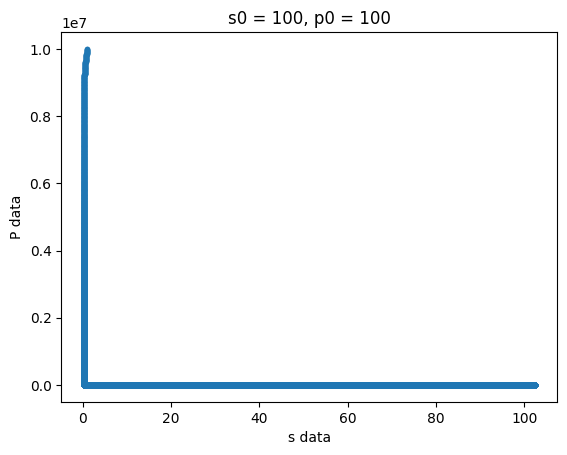

In [66]:
x_data = result.iloc[:,1]
y_data = result.iloc[:,2]

plt.scatter(x_data, y_data, marker = '.')
plt.xlabel('s data')
plt.ylabel('P data')
plt.title(f's0 = 100, p0 = 100')
plt.show

4. It seems like there are always the same cycling concentrations for a set of s and p values, but this cyclic behavior goes away when there are huge differences in the initial values, such as s=1 and p=100000 or vice versa.